## Caricamento delle Librerie e dei Dati

In [21]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("DataSetExpertLabeled.csv")

## Visualizzazione del DataSet

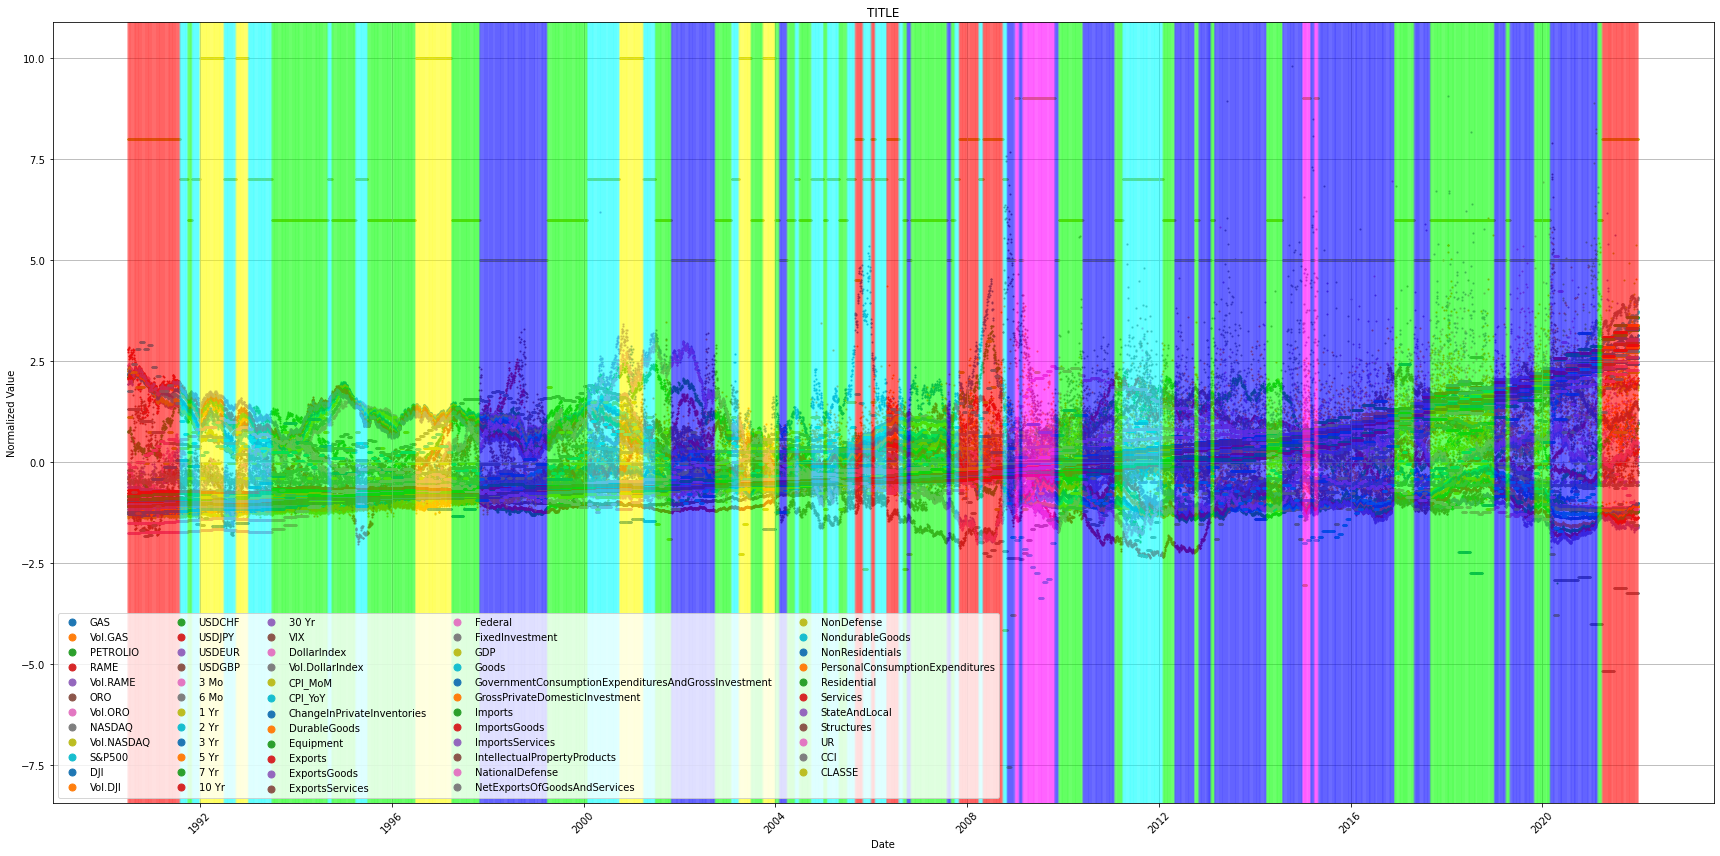

In [30]:
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    if(row['CLASSE'] == 5.0):
        plt.axvline(r, color=(0, 0, 1, 0.5), alpha=0.1)
    if(row['CLASSE'] == 6.0):
        plt.axvline(r, color=(0, 1, 0, 0.5), alpha=0.1)
    if(row['CLASSE'] == 7.0):
        plt.axvline(r, color=(0, 1, 1, 0.5), alpha=0.1)        
    if(row['CLASSE'] == 8.0):
        plt.axvline(r, color=(1, 0, 0, 0.5), alpha=0.1)        
    if(row['CLASSE'] == 9.0):
        plt.axvline(r, color=(1, 0, 1, 0.5), alpha=0.1)        
    if(row['CLASSE'] == 10.0):
        plt.axvline(r, color=(1, 1, 0, 0.5), alpha=0.1)  

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Primo Modello: Random Forest (con tutte le serie temporali tranne i dati relativi a CPI e GDP)

In [143]:
X = df[['GAS', 'Vol.GAS', 'PETROLIO', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 
        'NASDAQ', 'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'VIX',
        'USDCHF', 'USDJPY', 'USDEUR', 'USDGBP', 'DollarIndex', 'Vol.DollarIndex',
        '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr',
       'UR', 'CCI']]

y = df['CLASSE']

# Divide il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e allena il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Esegue le previsioni
y_pred = rf_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuratezza del modello:', accuracy)

Accuratezza del modello: 0.9945454545454545


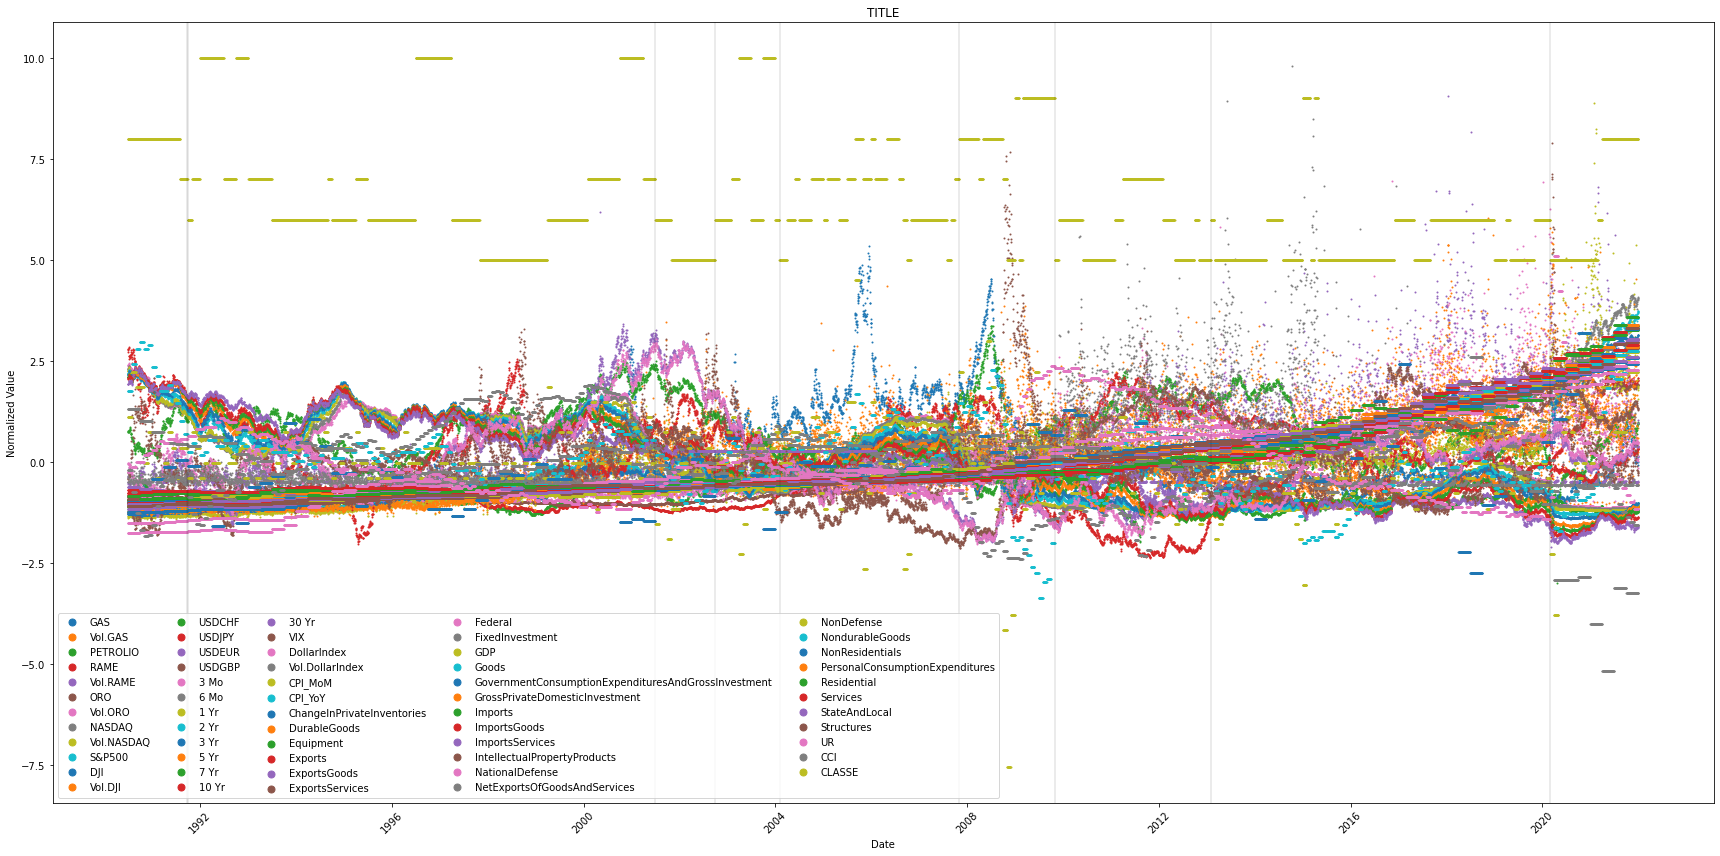

In [145]:
i = 0
tmp = {}
for test, pred in zip(y_test, y_pred):
    tmp[y_test.index[i]] = [test, pred]
    i += 1
    
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    if(index in tmp.keys()):
        if(tmp[index][0] != tmp[index][1]):
            plt.axvline(r, color=(0, 0, 0, 1), alpha=0.1)

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
#plt.grid(True) 

plt.show()

## Secondo Modello: Random Forest (con le serie temporali di prima meno UR e CCI)

In [127]:
X = df[['GAS', 'Vol.GAS', 'PETROLIO', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 
        'NASDAQ', 'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'VIX',
        'USDCHF', 'USDJPY', 'USDEUR', 'USDGBP', 'DollarIndex', 'Vol.DollarIndex',
        '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']]

y = df['CLASSE']

# Divide il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea e allena il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Esegue le previsioni
y_pred = rf_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuratezza del modello:', accuracy)

Accuratezza del modello: 0.9812121212121212


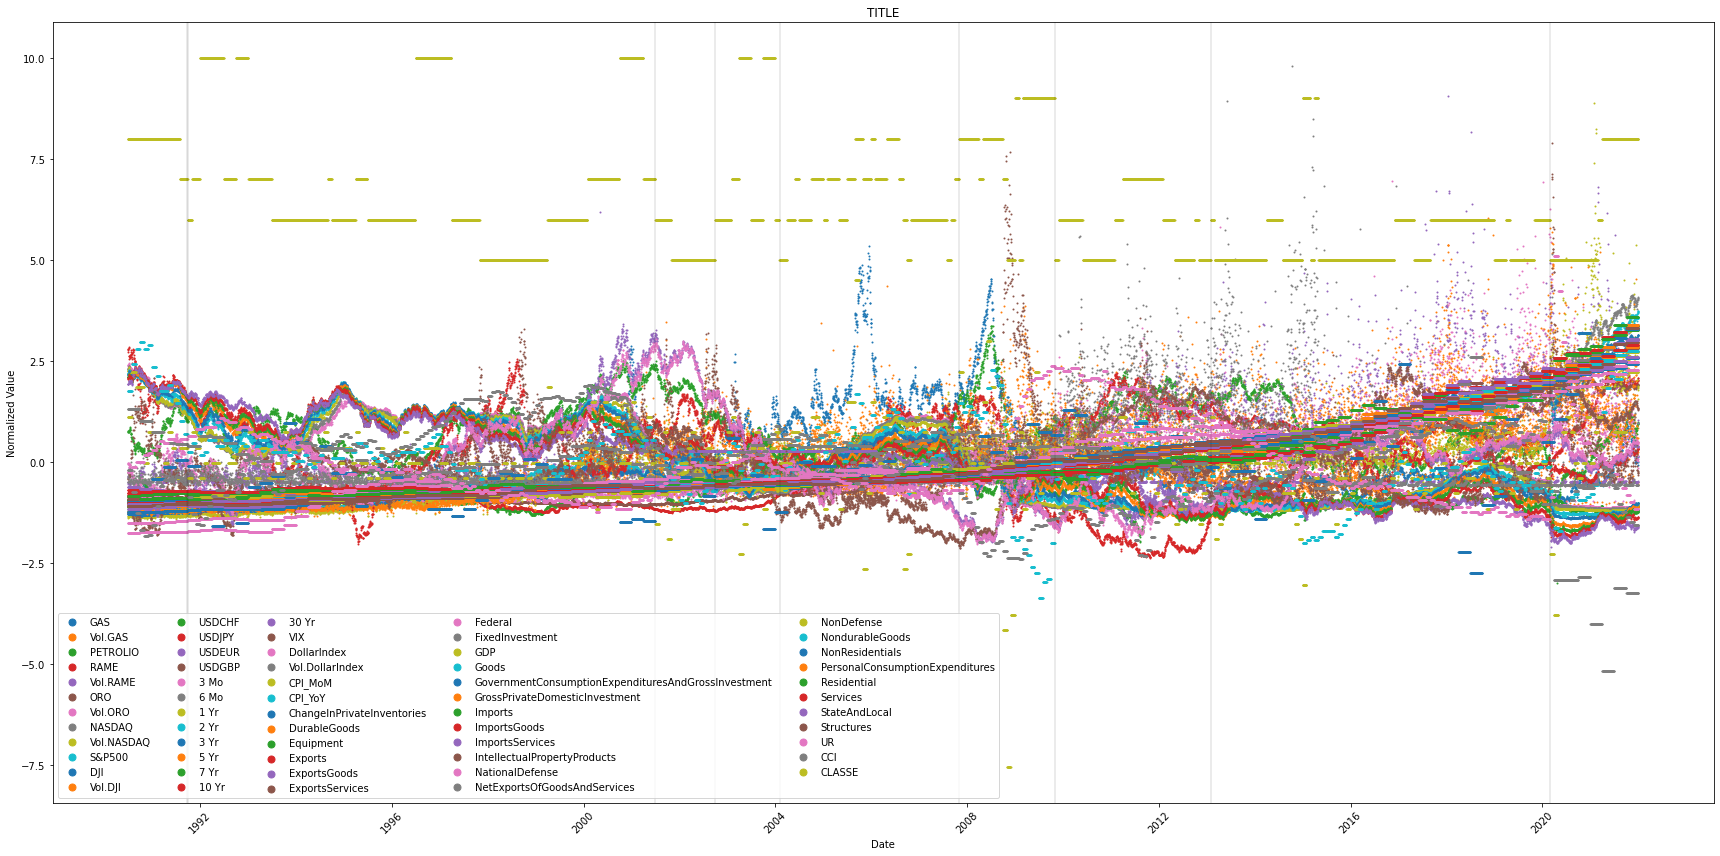

In [146]:
i = 0
tmp = {}
for test, pred in zip(y_test, y_pred):
    tmp[y_test.index[i]] = [test, pred]
    i += 1
    
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    if(index in tmp.keys()):
        if(tmp[index][0] != tmp[index][1]):
            plt.axvline(r, color=(0, 0, 0, 1), alpha=0.1)

# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
#plt.grid(True) 

plt.show()

## Terzo Modello: Random Forest (come prima ma con il Dataset diviso non casualmente)

In [148]:
X = df[['GAS', 'Vol.GAS', 'PETROLIO', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 
        'NASDAQ', 'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'VIX',
        'USDCHF', 'USDJPY', 'USDEUR', 'USDGBP', 'DollarIndex', 'Vol.DollarIndex',
        '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr']]

y = df['CLASSE']

# Calcola l'indice a cui corrisponde il 65% del dataset (train set)
train_index = int(0.65 * len(df))

# Dividi il dataset in set di addestramento e test
X_train = X[:train_index]
y_train = y[:train_index]
X_test = X[train_index:]
y_test = y[train_index:]

# Crea e allena il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Esegui le previsioni
y_pred = rf_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuratezza del modello:', accuracy)

Accuratezza del modello: 0.6241773467267059


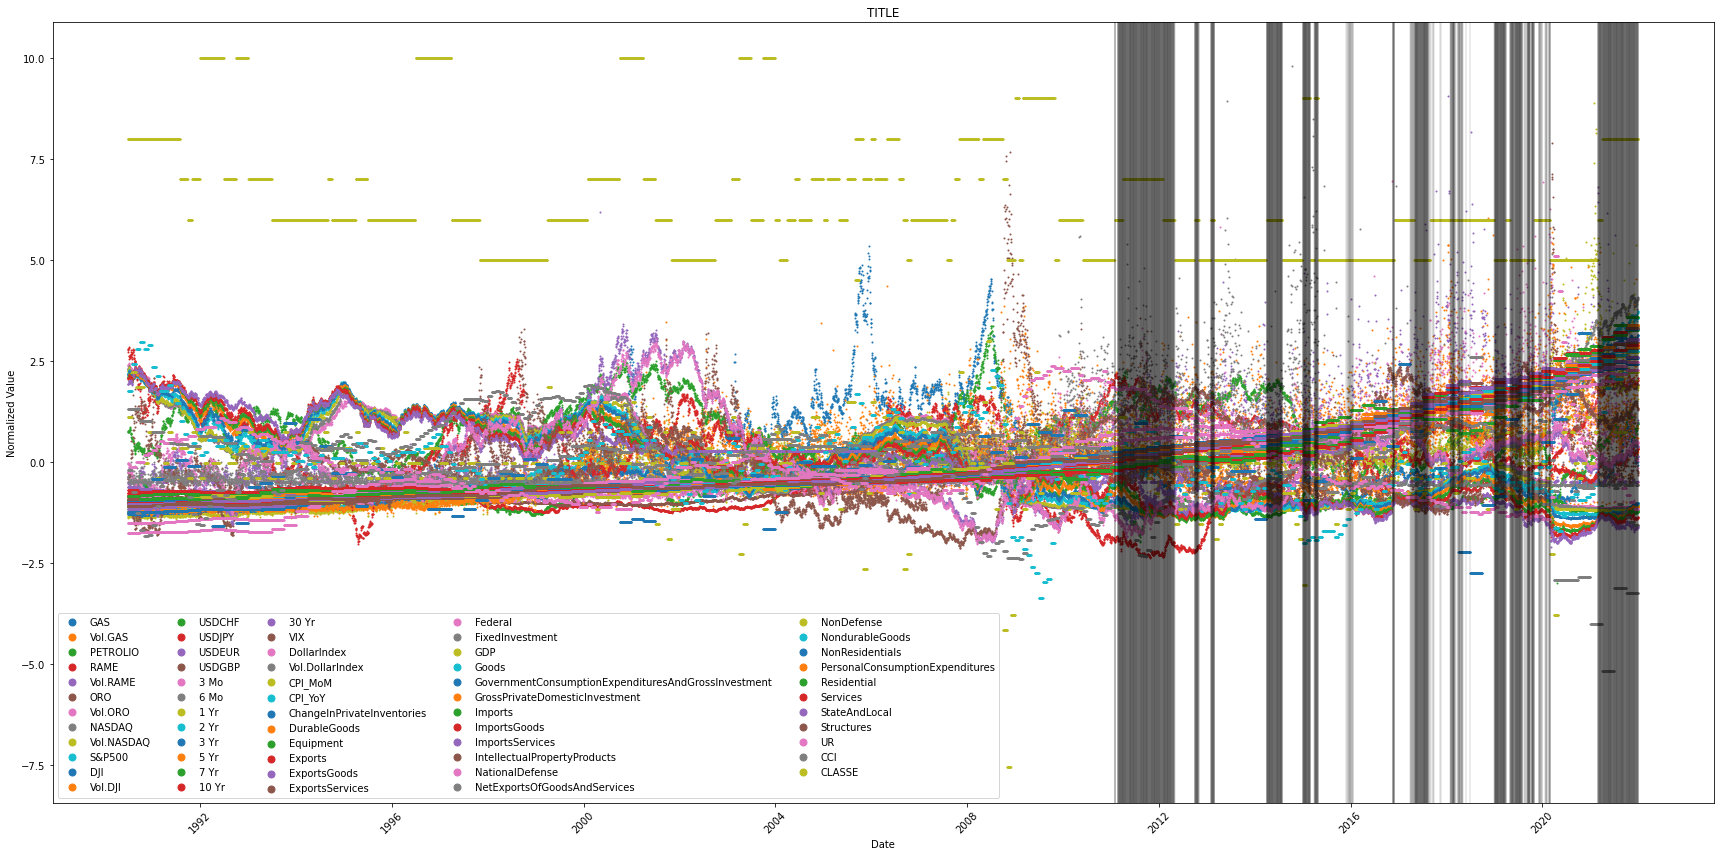

In [149]:
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    #if(row['CLASSE'] == 5.0):
        #plt.axvline(r, color=(0, 0, 1, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 6.0):
        #plt.axvline(r, color=(0, 1, 0, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 7.0):
        #plt.axvline(r, color=(0, 1, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 8.0):
        #plt.axvline(r, color=(1, 0, 0, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 9.0):
        #plt.axvline(r, color=(1, 0, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 10.0):
        #plt.axvline(r, color=(1, 1, 0, 0.5), alpha=0.1)  
    if(index >= y_test.index[0]):
        if(y_pred[index - y_test.index[0]] != y_test[index]):
            plt.axvline(r, color=(0, 0, 0, 1), alpha=0.1)
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
#plt.grid(True) 

plt.show()

## Quarto Modello: come prima ma aggiungendo UR e CCI (le performance decrescono!!)

In [123]:
X = df[['GAS', 'Vol.GAS', 'PETROLIO', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 
        'NASDAQ', 'Vol.NASDAQ', 'S&P500', 'DJI', 'Vol.DJI', 'VIX',
        'USDCHF', 'USDJPY', 'USDEUR', 'USDGBP', 'DollarIndex', 'Vol.DollarIndex',
        '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '30 Yr',
       'UR', 'CCI']]

y = df['CLASSE']

# Calcola l'indice a cui corrisponde il 65% del dataset (train set)
train_index = int(0.65 * len(df))

# Dividi il dataset in set di addestramento e test
X_train = X[:train_index]
y_train = y[:train_index]
X_test = X[train_index:]
y_test = y[train_index:]

# Crea e allena il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Esegui le previsioni
y_pred = rf_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuratezza del modello:', accuracy)

Accuratezza del modello: 0.6127467959819882


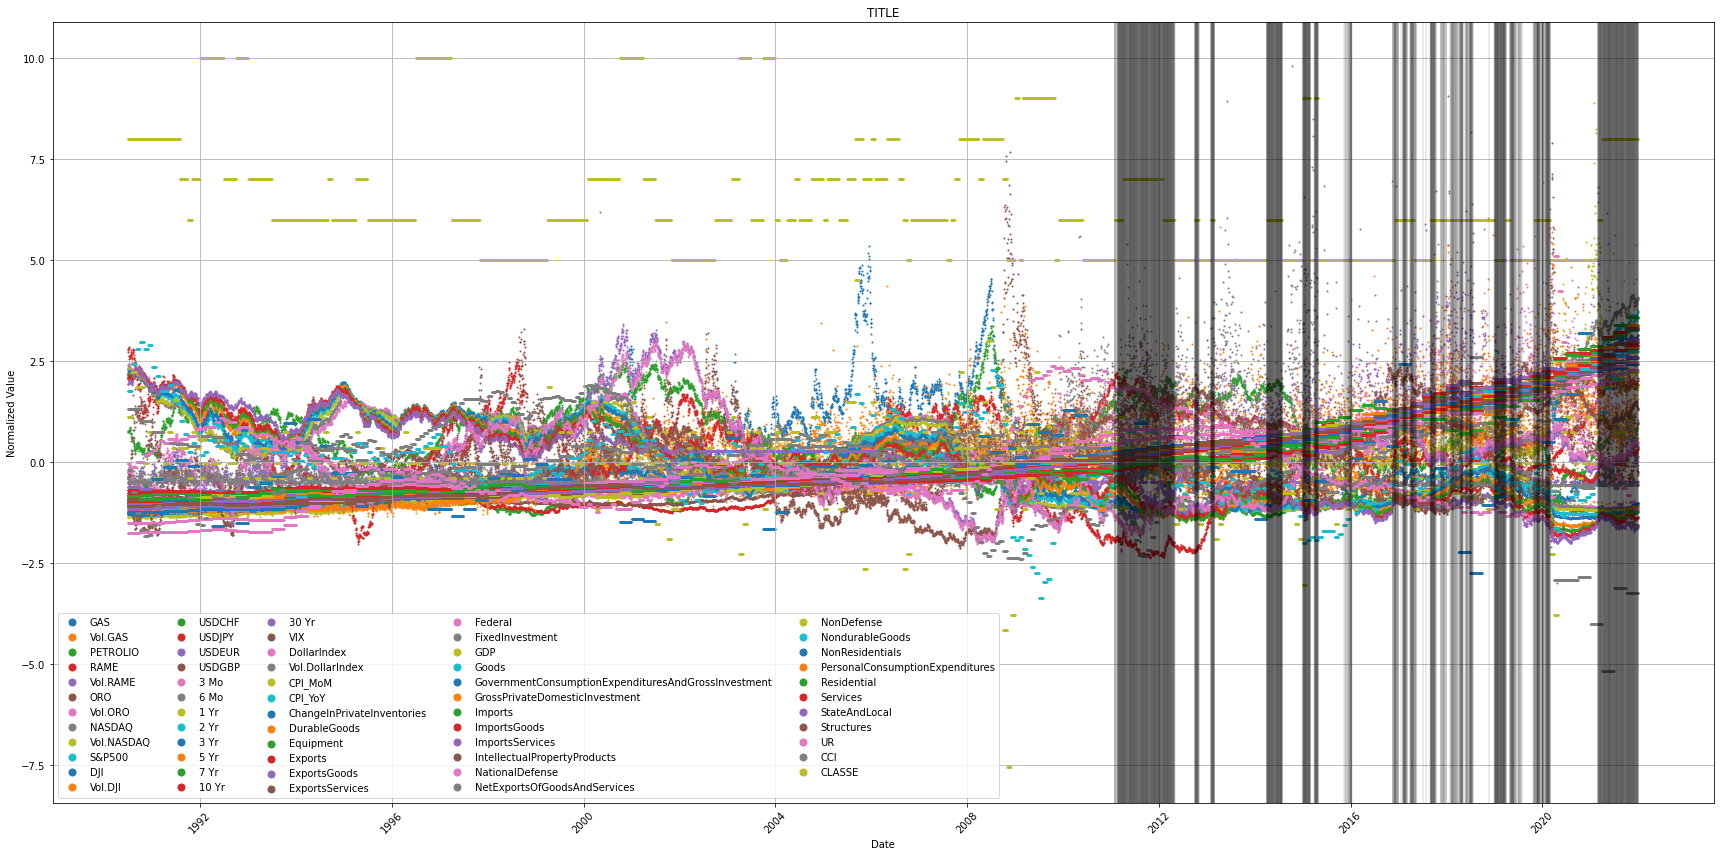

In [124]:
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    #if(row['CLASSE'] == 5.0):
        #plt.axvline(r, color=(0, 0, 1, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 6.0):
        #plt.axvline(r, color=(0, 1, 0, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 7.0):
        #plt.axvline(r, color=(0, 1, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 8.0):
        #plt.axvline(r, color=(1, 0, 0, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 9.0):
        #plt.axvline(r, color=(1, 0, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 10.0):
        #plt.axvline(r, color=(1, 1, 0, 0.5), alpha=0.1)  
    if(index >= y_test.index[0]):
        if(y_pred[index - y_test.index[0]] != y_test[index]):
            plt.axvline(r, color=(0, 0, 0, 1), alpha=0.1)
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

## Quinto Modello: come prima ma tolgo un po' di serie temporali

In [125]:
X = df[['GAS', 'Vol.GAS', 'PETROLIO', 'RAME', 'Vol.RAME', 'ORO', 'Vol.ORO', 
        'S&P500', 'DJI', 'Vol.DJI', 'VIX',
        'USDCHF', 'USDJPY', 'USDGBP', 'DollarIndex', 'Vol.DollarIndex',
        '3 Mo', '2 Yr', '10 Yr', '30 Yr']]

y = df['CLASSE']

# Calcola l'indice a cui corrisponde il 65% del dataset (train set)
train_index = int(0.65 * len(df))

# Dividi il dataset in set di addestramento e test
X_train = X[:train_index]
y_train = y[:train_index]
X_test = X[train_index:]
y_test = y[train_index:]

# Crea e allena il modello Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Esegui le previsioni
y_pred = rf_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print('Accuratezza del modello:', accuracy)

Accuratezza del modello: 0.5902320748181503


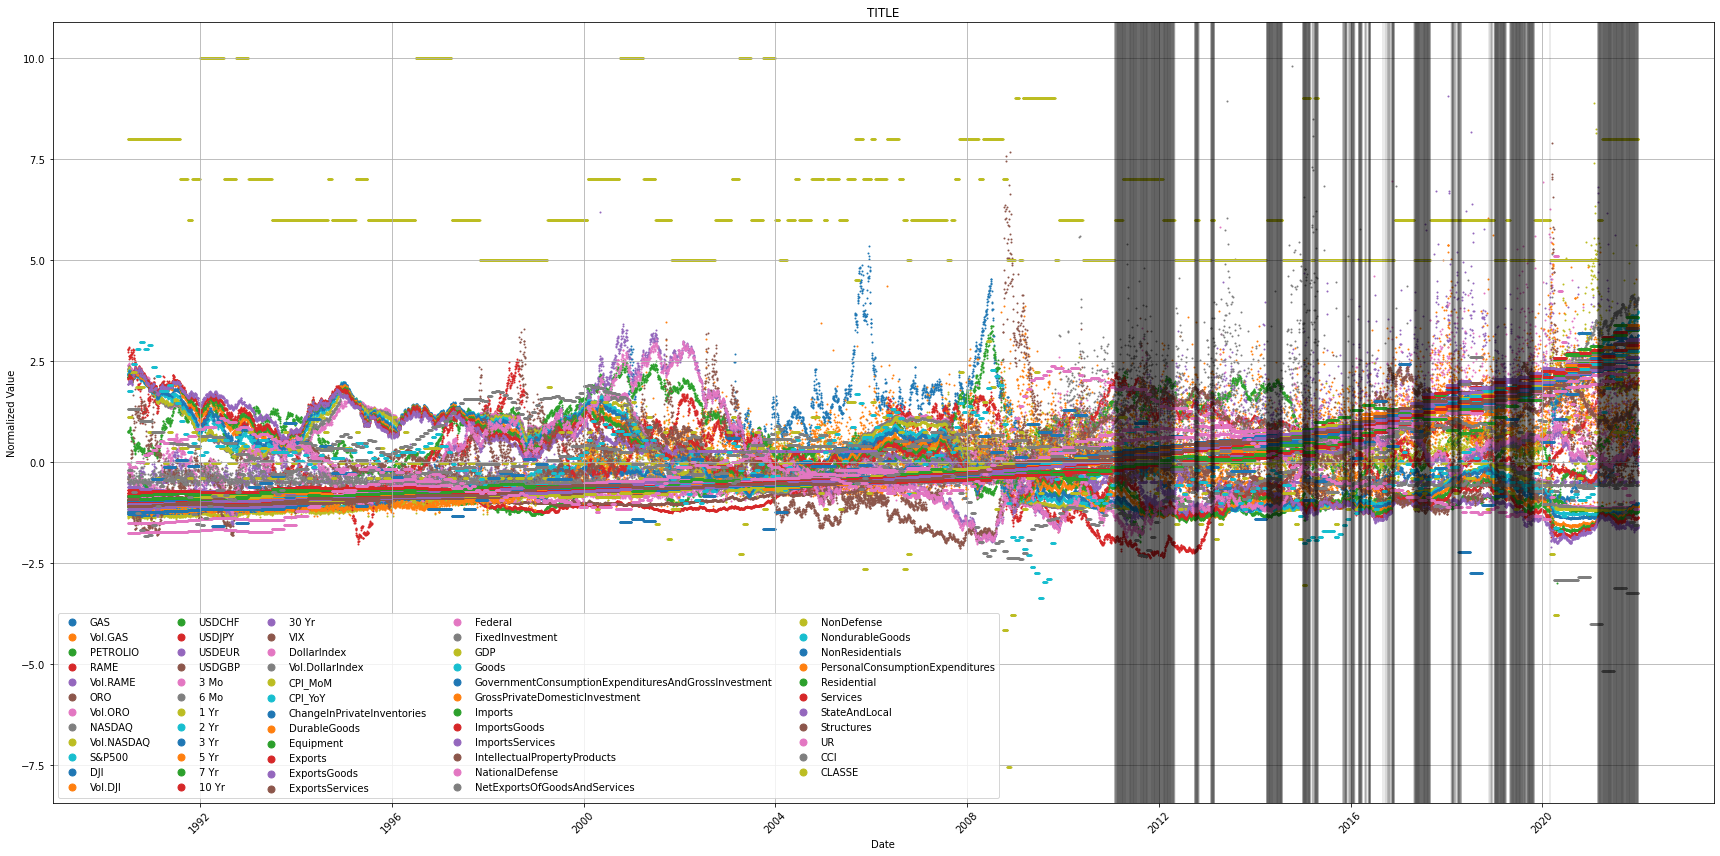

In [126]:
plt.figure(figsize=(24, 12))

for index, row in df.iterrows():
    r = pd.to_datetime(row['Date'], format='%Y/%m/%d')
    #if(row['CLASSE'] == 5.0):
        #plt.axvline(r, color=(0, 0, 1, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 6.0):
        #plt.axvline(r, color=(0, 1, 0, 0.5), alpha=0.1)
    #if(row['CLASSE'] == 7.0):
        #plt.axvline(r, color=(0, 1, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 8.0):
        #plt.axvline(r, color=(1, 0, 0, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 9.0):
        #plt.axvline(r, color=(1, 0, 1, 0.5), alpha=0.1)        
    #if(row['CLASSE'] == 10.0):
        #plt.axvline(r, color=(1, 1, 0, 0.5), alpha=0.1)  
    if(index >= y_test.index[0]):
        if(y_pred[index - y_test.index[0]] != y_test[index]):
            plt.axvline(r, color=(0, 0, 0, 1), alpha=0.1)
# Iteriamo sulle colonne del DataFrame normalizzato
for col in df.columns:
    if(col != 'Date'):  # Escludiamo la colonna 'Date'
        plt.scatter(df['Date'], df[col], label=col, s=1)
        
# Aggiungiamo etichette e titolo
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.title('TITLE')

# Aggiungiamo la legenda
plt.legend(loc='lower left', fontsize=10., markerscale=7, ncol=5)

# Ruotiamo le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostriamo il grafico
plt.tight_layout()
plt.grid(True) 

plt.show()

###### Devo cercare di ottenere un modello che predica bene ma che poco prima che cambi la 
###### classe anticipi il cambio di classe misclassificando gli ultimi valori della classe prima che cambi.